<center><h1 style="color: #CD5B45;">DESARROLLO SOLUCION PROPUESTA PARCIAL #2 PARTE B</h1></center>


<center><h2 style="color: #FF7256;">CADENAS DE MARKOV EN TIEMPO CONTINUO, TEORIA DE COLAS, PROCESO POISSON</h2></center>

<h3 style="color: #FF7256;">PUNTO 1 ----</h3>

En una guarderia hay $N$ niños y sólo una persona encargada de cuidarlos. De vez en cuando un bebé empieza a llorar exigiendo la atención de la niñera. Si la niñera está ocupada atendiendo a otro bebé, el nuevo bebé que llora debe esperar su turno. Si en el tiempo $t$ un bebé está tranquilo entonces la probabilidad de que él empiece a llorar y exija ser atendido en el intervalo de tiempo $(t, t+h]$ es igual a $\lambda h+o(h)$. Si en el tiempo $t$ un bebé está siendo atendido por la niñera entonces la probabilidad de que él se calme en el intervalo de tiempo $(t, t+h]$ es igual a $\mu h+o(h)$. Supóngase que $X_t:=$ " número de bebés que están exigiendo ser atendidos en el tiempo $t$ ".
    
- [A]  Asumimos $X_0=0, N=5$, los valores $\lambda=0,5$, y $\mu=0,3$. ¿ Cuál es la probabilidad de que a la larga haya 0 bebés esperando ser atendidos?
- [B]  Asumimos $X_0=0, N=5$, los valores $\lambda=0,3$, y $\mu=0,5$. $i$ Cuál es la probabilidad de que a la larga haya 0 bebés esperando ser atendidos?

**Ayuda:** En este caso tenemos un proceso de nacimiento y muerte para el cual las tasas de nacimiento y muerte son, respectivamente, iguales a $\lambda_i=(N-i) \lambda$ si $0 \leq i \leq N$ y $\mu_i=\mu$ para todo $i \geq 1$, es decir se trata de una cola de espera del tipo M/M/1/N\\

<p style="color: #FF7256;"><strong>SOLUCION PUNTO #1</strong></p>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial

import warnings
warnings.filterwarnings("ignore")

In [26]:
# Parámetros generales
N = 5  # Número de bebés

# Función para calcular π0
def calcular_pi0(lam, mu, N):
    # Calculamos la sumatoria
    sumatoria = sum([factorial(N) / factorial(N - i) * (lam / mu) ** i for i in range(N + 1)])
    # Calculamos π0
    pi0 = 1 / sumatoria
    return pi0

In [27]:
# Parámetros del Caso A
lambda_A = 0.5
mu_A = 0.3

# Cálculo de π0 para el Caso A
pi0_A = calcular_pi0(lambda_A, mu_A, N)
print(f"Probabilidad de que no haya bebés esperando ser atendidos (Caso A): {pi0_A}")

Probabilidad de que no haya bebés esperando ser atendidos (Caso A): 0.00035564375911062706


In [28]:
# Parámetros del Caso B
lambda_B = 0.3
mu_B = 0.5

# Cálculo de π0 para el Caso B
pi0_B = calcular_pi0(lambda_B, mu_B, N)
print(f"Probabilidad de que no haya bebés esperando ser atendidos (Caso B): {pi0_B}")

Probabilidad de que no haya bebés esperando ser atendidos (Caso B): 0.020390186610987866


In [29]:
# Definir un rango de valores para lambda y mu
lambda_values = np.arange(0.1, 1.1, 0.1)
mu_values = np.arange(0.1, 1.1, 0.1)

# Crear una matriz para almacenar los resultados de pi0
pi0_matrix = np.zeros((len(lambda_values), len(mu_values)))

# Calcular pi0 para cada combinación de lambda y mu
for i, lam in enumerate(lambda_values):
    for j, mu in enumerate(mu_values):
        pi0_matrix[i, j] = calcular_pi0(lam, mu, N)

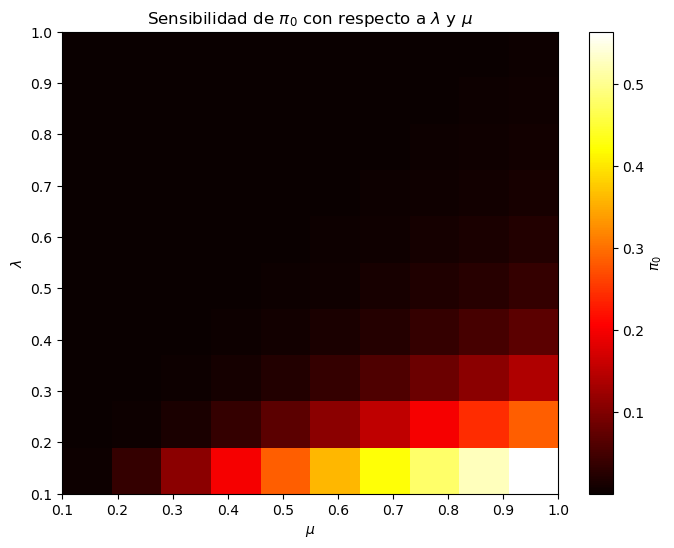

In [30]:
# Graficar como un mapa de calor
plt.figure(figsize=(8, 6))
plt.imshow(pi0_matrix, cmap='hot', interpolation='nearest', origin='lower', aspect='auto',
           extent=[mu_values[0], mu_values[-1], lambda_values[0], lambda_values[-1]])
plt.colorbar(label=r'$\pi_0$')
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\lambda$')
plt.title(r'Sensibilidad de $\pi_0$ con respecto a $\lambda$ y $\mu$')
plt.show()

In [31]:
# Definir un rango de valores para lambda/mu
lambda_mu_ratio = np.arange(0.1, 2.1, 0.1)
mu_fixed = 0.5

# Calcular pi0 para cada relación
pi0_values = [calcular_pi0(ratio * mu_fixed, mu_fixed, N) for ratio in lambda_mu_ratio]

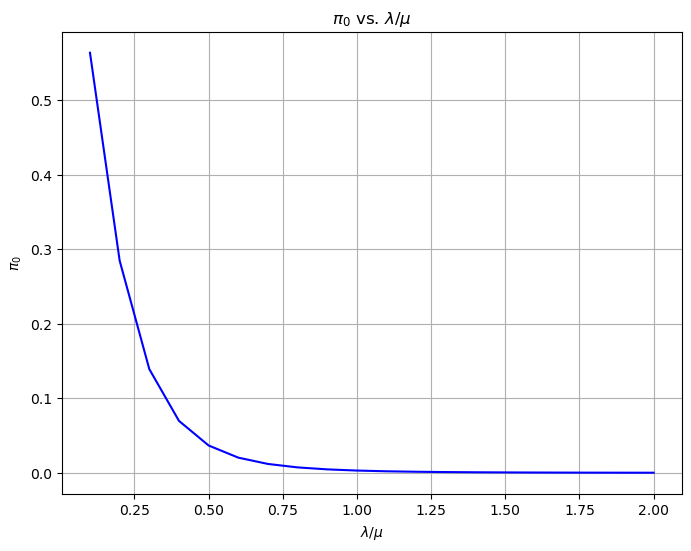

In [32]:
# Graficar
plt.figure(figsize=(8, 6))
plt.plot(lambda_mu_ratio, pi0_values, color='blue')
plt.xlabel(r'$\lambda/\mu$')
plt.ylabel(r'$\pi_0$')
plt.title(r'$\pi_0$ vs. $\lambda/\mu$')
plt.grid(True)
plt.show()

<h3 style="color: #FF7256;">PUNTO #2 ----</h3>


Escriba un programa de R o Python $u$ otras para simular un proceso de Poisson no homogéneo con intensidad $\lambda_1(t)=\exp (-t / 5)+t / 5$, y $\lambda_2(t)=\frac{1}{2} \sqrt{t / 2}$ en el intervalo $[0,5000]$

<p style="color: #FF7256;"><strong>SOLUCION PUNTO #2</strong></p>

In [33]:
import numpy as np
import matplotlib.pyplot as plt

In [34]:
def simulate_nhpp(lambda_func, T_max):
    # Paso 1: Obtener la tasa máxima lambda_max
    time_grid = np.linspace(0, T_max, num=1000)
    lambda_max = max(lambda_func(time_grid))
    
    # Paso 2: Inicialización
    t = 0
    events = []
    
    while t < T_max:
        # Paso 3: Generar un tiempo inter-arrival
        u = np.random.uniform()
        t = t - np.log(u) / lambda_max
        
        if t > T_max:
            break
        
        # Paso 4: Aceptación-Rechazo
        u2 = np.random.uniform()
        if u2 <= lambda_func(t) / lambda_max:
            events.append(t)
    
    return np.array(events)

In [35]:
# Intensidades lambda1 y lambda2
def lambda1(t):
    return np.exp(-t / 5) + t / 5

def lambda2(t):
    return 0.5 * np.sqrt(t / 2)

In [36]:
# Simulación en el intervalo [0, 5000]
np.random.seed(42)  # Para reproducibilidad
T_max = 5000

events_lambda1 = simulate_nhpp(lambda1, T_max)
events_lambda2 = simulate_nhpp(lambda2, T_max)

# Mostrar los primeros 10 eventos simulados para cada proceso
print("Eventos simulados para lambda1:\n", events_lambda1[:10])
print("\nEventos simulados para lambda2:\n", events_lambda2[:10])

Eventos simulados para lambda1:
 [2.12236885 2.4024505  3.53141529 3.64792078 3.9401412  4.0986683
 4.65429936 5.01074246 5.08733984 5.97139276]

Eventos simulados para lambda2:
 [ 0.93521876  3.40656302  4.27852023  4.43664405  6.02399266  7.27590871
  9.86021227 12.29483069 12.48237844 13.3329697 ]


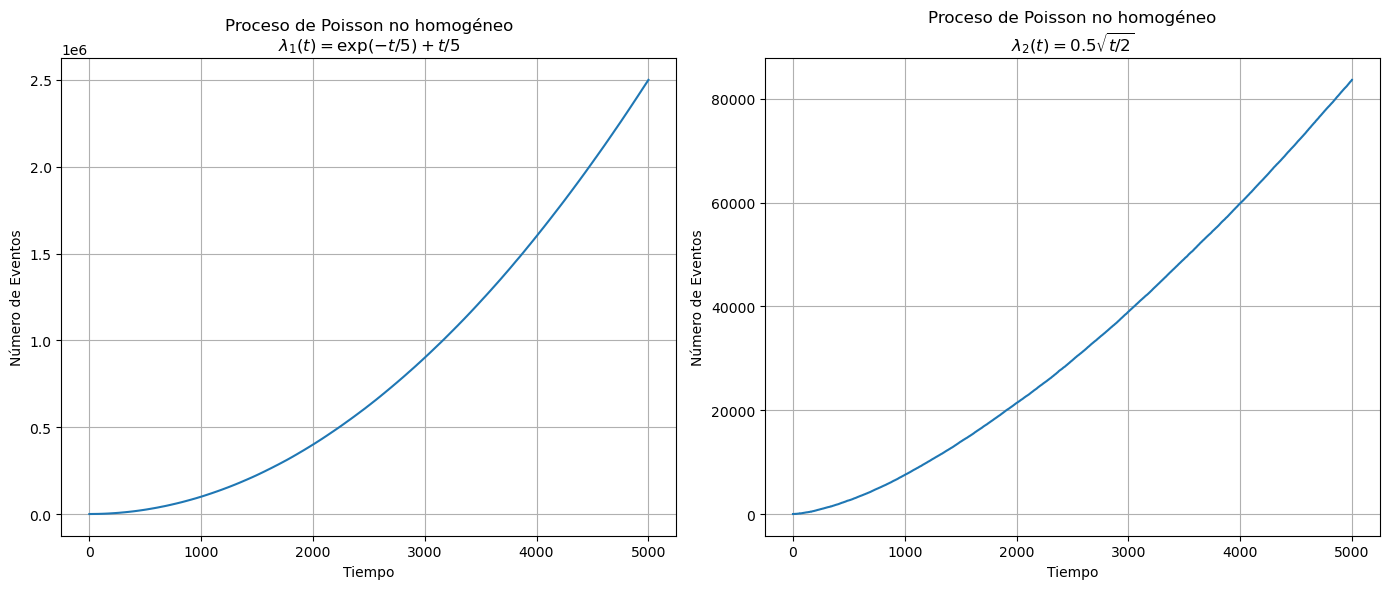

In [37]:
# Gráfico de los resultados
plt.figure(figsize=(14, 6))

# Gráfico de lambda1
plt.subplot(1, 2, 1)
plt.step(events_lambda1, np.arange(1, len(events_lambda1) + 1), where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de Eventos')
plt.title('Proceso de Poisson no homogéneo\n$\lambda_1(t) = \exp(-t/5) + t/5$')
plt.grid(True)

# Gráfico de lambda2
plt.subplot(1, 2, 2)
plt.step(events_lambda2, np.arange(1, len(events_lambda2) + 1), where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de Eventos')
plt.title('Proceso de Poisson no homogéneo\n$\lambda_2(t) = 0.5\sqrt{t/2}$')
plt.grid(True)

plt.tight_layout()
plt.show()

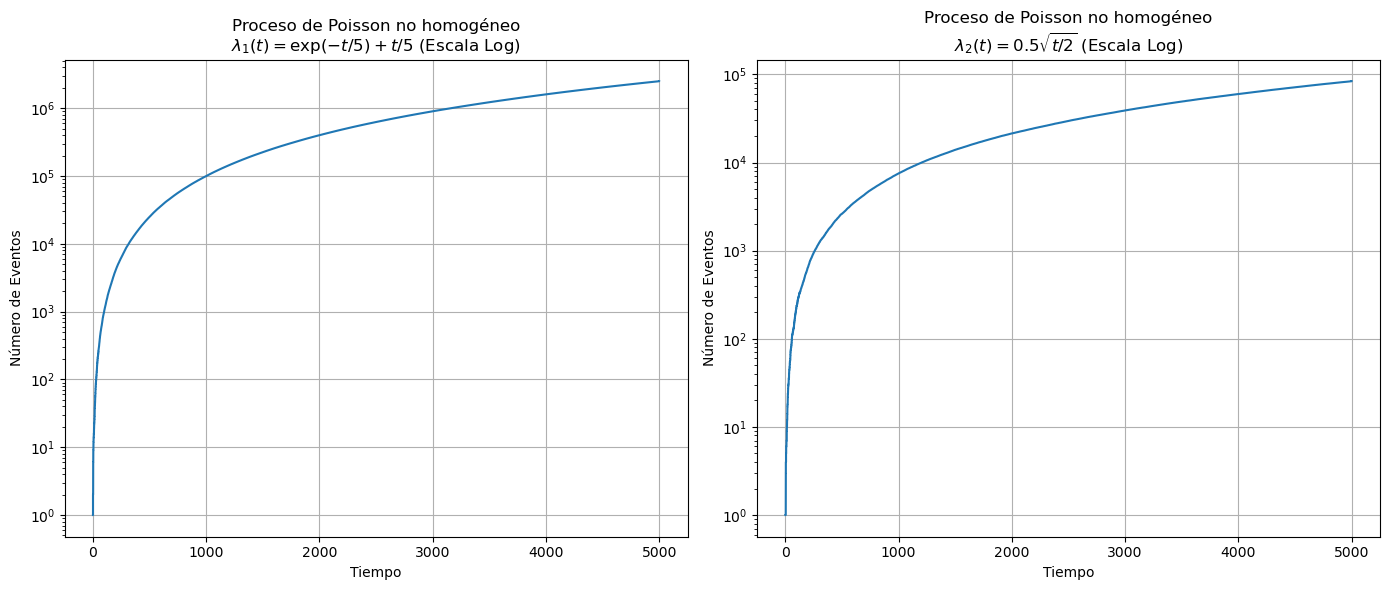

In [38]:
# Gráfico de los resultados con ajuste de escala
plt.figure(figsize=(14, 6))

# Gráfico de lambda1
plt.subplot(1, 2, 1)
plt.step(events_lambda1, np.arange(1, len(events_lambda1) + 1), where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de Eventos')
plt.yscale('log')
plt.title('Proceso de Poisson no homogéneo\n$\lambda_1(t) = \exp(-t/5) + t/5$ (Escala Log)')
plt.grid(True)

# Gráfico de lambda2
plt.subplot(1, 2, 2)
plt.step(events_lambda2, np.arange(1, len(events_lambda2) + 1), where='post')
plt.xlabel('Tiempo')
plt.ylabel('Número de Eventos')
plt.yscale('log')
plt.title('Proceso de Poisson no homogéneo\n$\lambda_2(t) = 0.5\sqrt{t/2}$ (Escala Log)')
plt.grid(True)

plt.tight_layout()
plt.show()

<h3 style="color: #FF7256;">PUNTO #3 ----</h3>

Haga un programa en R que simule al proceso de nacimiento puro $\left\{X_t, t \geq 0\right\}$ con $X(0)=1$. Si caso 1: $\lambda=i \lambda$, para $\lambda>0$, y caso 2 : $\lambda=i^2 \lambda$, para $\lambda>0$, comparar estos dos casos.

<p style="color: #FF7256;"><strong>SOLUCION PUNTO #3</strong></p>

In [39]:
import numpy as np
import matplotlib.pyplot as plt

In [40]:
def simulate_pure_birth_process(lambda_func, X0, T_max, max_events=1000):
    times = []
    states = []
    t = 0
    X_t = X0
    
    for _ in range(max_events):
        rate = lambda_func(X_t)
        t += np.random.exponential(1 / rate)
        
        if t > T_max:
            break
            
        X_t += 1
        times.append(t)
        states.append(X_t)
    
    return times, states

In [41]:

# Parámetros
X0 = 1  # Condición inicial X(0) = 1
T_max = 20  # Tiempo máximo de simulación
lambda_value = 0.5  # Valor de lambda (ajustado para evitar crecimiento rápido)

# Caso 1: λ = i * λ
def lambda_case1(i):
    return i * lambda_value

In [42]:
# Simulaciones
times_case1, states_case1 = simulate_pure_birth_process(lambda_case1, X0, T_max)

In [43]:
# Parámetros
X0 = 1  # Condición inicial X(0) = 1
T_max = 20  # Tiempo máximo de simulación
lambda_value = 0.5  # Valor de lambda (ajustado para evitar crecimiento rápido)


# Caso 2: λ = i^2 * λ
def lambda_case2(i):
    return (i ** 2) * lambda_value

In [44]:
# Simulaciones
times_case2, states_case2 = simulate_pure_birth_process(lambda_case2, X0, T_max)

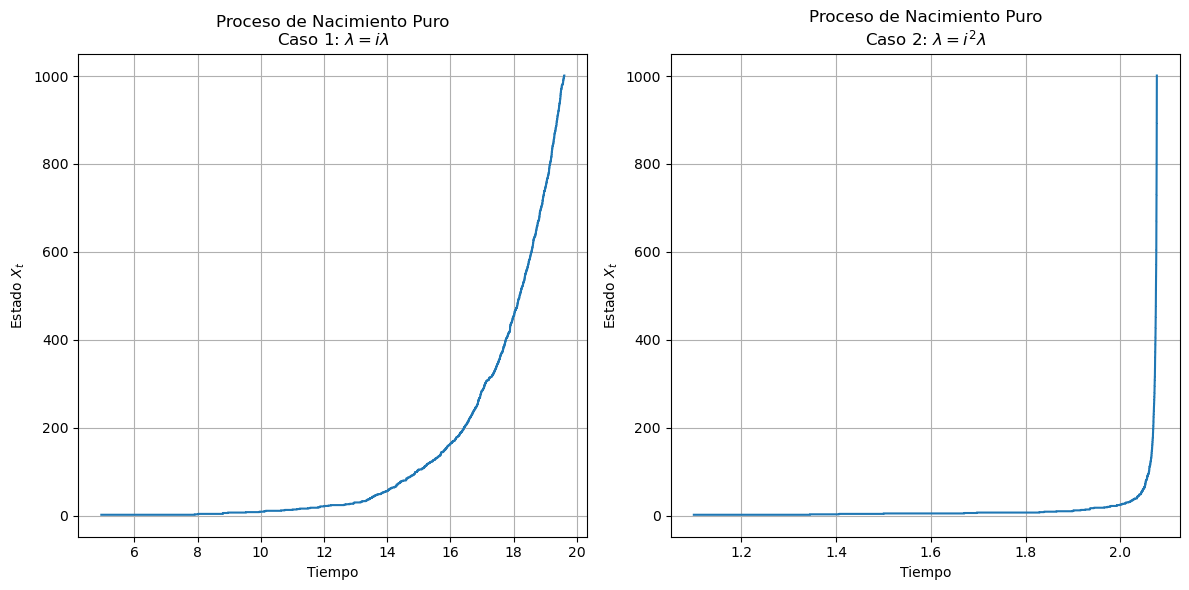

In [45]:
# Gráfica de los resultados
plt.figure(figsize=(12, 6))

# Graficar Caso 1
plt.subplot(1, 2, 1)
plt.step(times_case1, states_case1, where='post')
plt.xlabel('Tiempo')
plt.ylabel('Estado $X_t$')
plt.title('Proceso de Nacimiento Puro\nCaso 1: $\lambda = i \lambda$')
plt.grid(True)

# Graficar Caso 2
plt.subplot(1, 2, 2)
plt.step(times_case2, states_case2, where='post')
plt.xlabel('Tiempo')
plt.ylabel('Estado $X_t$')
plt.title('Proceso de Nacimiento Puro\nCaso 2: $\lambda = i^2 \lambda$')
plt.grid(True)

plt.tight_layout()
plt.show()

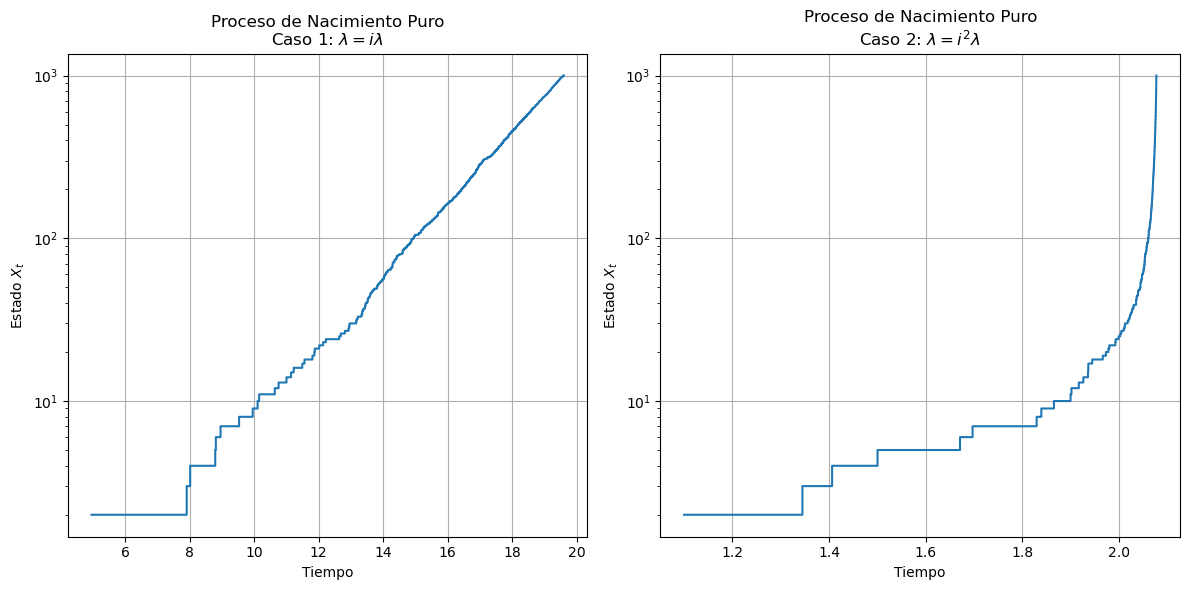

In [46]:
# Gráfica de los resultados
plt.figure(figsize=(12, 6))

# Graficar Caso 1
plt.subplot(1, 2, 1)
plt.step(times_case1, states_case1, where='post')
plt.xlabel('Tiempo')
plt.ylabel('Estado $X_t$')
plt.yscale('log')
plt.title('Proceso de Nacimiento Puro\nCaso 1: $\lambda = i \lambda$')
plt.grid(True)

# Graficar Caso 2
plt.subplot(1, 2, 2)
plt.step(times_case2, states_case2, where='post')
plt.xlabel('Tiempo')
plt.ylabel('Estado $X_t$')
plt.yscale('log')
plt.title('Proceso de Nacimiento Puro\nCaso 2: $\lambda = i^2 \lambda$')
plt.grid(True)

plt.tight_layout()
plt.show()

<h3 style="color: #FF7256;">PUNTO #4 ----</h3>

Sea $\left(X_t\right)_{t \geq 0}$ un proceso de nacimiento y muerte con $\lambda_i=\lambda$ y $\mu_i=i \mu$ para todo $i \in S$. Hallar (si existe) la distribución estacionaria de este proceso.

<p style="color: #FF7256;"><strong>SOLUCION PUNTO #4</strong></p>

Para encontrar la distribución estacionaria de un proceso de nacimiento y muerte con tasas $lambda_i = \lambda$ y $\mu_i = i \mu$, podemos seguir los siguientes pasos:

### Definición del Proceso:
- **Tasas de nacimiento**: $\lambda_i = \lambda$ (constante para todo $i$).
- **Tasas de muerte**: $\mu_i = i \mu$ (creciente linealmente con el estado $i$).

### Distribución Estacionaria:
La distribución estacionaria $\pi = \{\pi_i\}$ es la distribución de probabilidad en estado estacionario que satisface las siguientes ecuaciones:

1. **Condición de balance**:

   $
   \lambda_i \pi_i = \mu_{i+1} \pi_{i+1}
   $

   Sustituyendo las tasas:

   $
   \lambda \pi_i = (i+1) \mu \pi_{i+1}
   $

2. **Expresión recursiva**:
   
   $
   \pi_{i+1} = \frac{\lambda}{(i+1)\mu} \pi_i
   $

3. **Normalización**:
   La suma de todas las probabilidades debe ser 1:
   
   $
   \sum_{i=0}^{\infty} \pi_i = 1
   $

### Paso a Paso para Encontrar $\pi_i$:

1. **Condición inicial**: Empezamos con $\pi_0$.

2. **Expresión para $\pi_i$**:
   
   $
   \pi_i = \pi_0 \prod_{k=1}^{i} \frac{\lambda}{k \mu} = \pi_0 \left(\frac{\lambda}{\mu}\right)^i \frac{1}{i!}
   $

   Esta es la forma general de $\pi_i$ para $i \geq 1$.

3. **Normalización**: Aseguramos que la suma de todas las probabilidades sea 1:
   
   $
   \sum_{i=0}^{\infty} \pi_i = \pi_0 \sum_{i=0}^{\infty} \frac{1}{i!} \left(\frac{\lambda}{\mu}\right)^i = 1
   $
   
   La serie geométrica $\sum_{i=0}^{\infty} \frac{1}{i!} \left(\frac{\lambda}{\mu}\right)^i$ es la expansión de la función exponencial:
   
   $
   \sum_{i=0}^{\infty} \frac{1}{i!} \left(\frac{\lambda}{\mu}\right)^i = \exp\left(\frac{\lambda}{\mu}\right)
   $

   Entonces:
   $
   \pi_0 \exp\left(\frac{\lambda}{\mu}\right) = 1
   $
   
   $
   \pi_0 = \exp\left(-\frac{\lambda}{\mu}\right)
   $

4. **Distribución Estacionaria**:
   Finalmente, la distribución estacionaria es:
   
   $
   \pi_i = \frac{1}{i!} \left(\frac{\lambda}{\mu}\right)^i \exp\left(-\frac{\lambda}{\mu}\right)
   $

### Interpretación:
- La distribución estacionaria $\pi_i$ sigue una **distribución de Poisson** con parámetro $\frac{\lambda}{\mu}$.
- Esto significa que en el estado estacionario, el número de individuos en el sistema se distribuye de acuerdo a una distribución de Poisson con media $\frac{\lambda}{\mu}$.

### Conclusión:
La distribución estacionaria del proceso de nacimiento y muerte dado por $\lambda_i = \lambda$ y $\mu_i = i \mu$ es una distribución de Poisson con parámetro $\frac{\lambda}{\mu}$.